# Task 3

You are given a list of scores obtained in a certain exam, using Python:

1. plot its histogram and
1. test the normality using one-sided Chi-squared test. 


### Notes

* Use [numpy.histogram](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.histogram.html) that **takes** as an input *the data* and *bins count* and **generates** the *bins edges* and *the count at each bin*.
* Use sturges rule to estimate the number of bins:  $K = 1 +  \log_2( N )$.
* In order to plot the histogram, use the function [matplotlib.pyplot.hist](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html).
* Use the [scipy.stats.chisquare](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html), to test the goodness of fitting for the given data to the normal distribution.
* In order to get the expected number within a specified interval in gaussian distribution, use [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)



## A) Load the data into Numpy array (done)

In [1]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/sbme-tutorials/sbe2016-measurements-lab/master/mt-grades.csv'
df1 = pd.read_csv(url)
grades = np.array(df1.values)

## B) Plotting the histogram

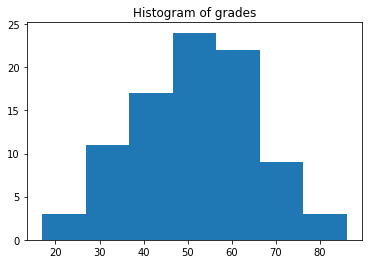

In [32]:
# get the count of grades (done)
n = grades.shape[0] # .shape[0] returns the value of the 1st dimension

# estimate the number of bins
import math
x=round(1+log2(n))
k=math.ceil(x)
# use np.histogram to generate the bins edges and count at each bin
edges, bins =np.histogram(grades,k)
# plot the histogram using the previously estimated edges (done for you)
import matplotlib.pyplot as plt
plt.hist(grades, bins)  # arguments are passed to np.histogram
plt.title("Histogram of grades")
plt.show()

## C) Testing normality

In [42]:
from scipy.stats import norm
from scipy.stats import chisquare 
import math

mean_value =np.mean(grades)
print("mean_value=",mean_value)

standarded_deviation=np.std(grades)
print("standarded_deviation=",standarded_deviation)

#giting the expected freq
E_freq= (norm.cdf(bins, mean_value, standarded_deviation)) * n
print ("expected freq=", E_freq)
#gitting cumulative value to get estimated freq
cumulative=0
for i in range(1,len(E_freq)):
    cumulative+=E_freq[i-1]
    E_freq[i] = E_freq[i] - cumulative
#deleting the 1st index to get the same size for edges and E_freq
E_freq=np.delete(E_freq,0)
statics, pVal = chisquare(edges , E_freq)
print (" pVal=",pVal)

#giting pVal as precentage
pVal =pVal * 100
print (" %pVal=",pVal)

mean_value= 51.7752808988764
standarded_deviation= 13.817228139551785
expected freq= [ 0.52698706  3.17390587 12.26892775 31.43727418 56.23523412 75.93301426
 85.5376646  88.41034468]
 pVal= 0.9844554031521048
 %pVal= 98.44554031521048
